# AquaMatrix

# Ground Water Data Analysis and Prediction 

<div style="display: flex; justify-content: center; align-items: center;">
  <img src="into 2.webp" alt="Image 1" style="max-width: 45%; max-height: 400px; margin-right: 20px;">
  <img src="into.jpg" alt="Image 2" style="max-width: 45%; max-height: 400px;">
</div>


**Groundwater** is essential for **drinking water**, **agriculture**, **industry**, and **ecosystems**. The dataset includes **groundwater levels**, **site names**, **well IDs**, **well depths**, and **geographic coordinates** across **states, districts, blocks**, and **villages** from **2015 to 2022**. It helps in understanding **trends**, predicting **water availability**, and ensuring **sustainable management**.

<div style="text-align: center;">
    <img src="rain.jpeg" alt="Thank You" style="width: 1000px; height: 400px;">
</div>

<div style="text-align: center;">
    <img src="aqui.jpg" alt="Thank You" style="width: 800px; height: 400px;">
</div>

**Aquifer:** An aquifer is a geological formation that can store, transmit, and yield water to wells and springs.
           
**Water Table:** The water table is the upper surface of the zone of saturation in an aquifer, where the soil or rocks are fully saturated with water.
     
**Difference:** An aquifer is a water-bearing formation that stores groundwater, while the water table is the level within an aquifer where the ground transitions from unsaturated to saturated with water.

# 1. Data Extraction

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('Atal_Jal_Disclosed_Ground_Water.csv')
df.head()

,Sr. No.,State_Name_With_LGD_Code,District_Name_With_LGD_Code,Block_Name_With_LGD_Code,GP_Name_With_LGD_Code,Village,Site_Name,TYPE,SOURCE,Well_ID,...,Pre-monsoon_2018 (meters below ground level),Post-monsoon_2018 (meters below ground level),Pre-monsoon_2019 (meters below ground level),Post-monsoon_2019 (meters below ground level),Pre-monsoon_2020 (meters below ground level),Post-monsoon_2020 (meters below ground level),Pre-monsoon_2021 (meters below ground level),Post-monsoon_2021 (meters below ground level),Pre-monsoon_2022 (meters below ground level),Post-monsoon_2022 (meters below ground level)
0,1,Gujarat_24,Banaskantha_441,Dantiwada_3735,NaN,Deri,Deri,Piezometer,SGWD,G_1_BK_021,...,8.1,13.55,24.4,11.2,13.35,3.1,20.80,16.90,20.2,12.3
1,2,Gujarat_24,Banaskantha_441,Dantiwada_3735,Akoli_155943,Akoli,Akoli,Piezometer,SGWD,G_1_BK_018,...,15.8,21.30,55.6,49.4,57.10,34.1,58.20,49.45,51.4,46.4
2,3,Gujarat_24,Banaskantha_441,Dantiwada_3735,Bhadli Kotha_155946,Bhadli kotha,Bhadli kotha,Piezometer,SGWD,G_1_BK_019,...,27.7,21.60,27.5,21.2,20.00,19.1,19.45,18.15,Dry,Dry
3,4,Gujarat_24,Banaskantha_441,Dantiwada_3735,Dantiwada_155954,Dantiwada,Dantiwada,Piezometer,SGWD,G_1_BK_020,...,8.6,7.85,11.1,10.2,8.80,2.7,10.80,6.80,12.4,6.45
4,5,Gujarat_24,Banaskantha_441,Dantiwada_3735,Gundari_155956,Gundari,Gundari,Dug Well,SGWD,BK-105,...,15.2,11.20,17.3,13.9,16.00,10.0,22.20,19.80,21.6,20.3


In [2]:
df.columns

Index(['Sr. No.', 'State_Name_With_LGD_Code', 'District_Name_With_LGD_Code',
       'Block_Name_With_LGD_Code', 'GP_Name_With_LGD_Code', 'Village',
       'Site_Name', 'TYPE', 'SOURCE', 'Well_ID', 'Latitude', 'Longitude',
       'Well_Depth (meters)', 'Aquifer',
       'Pre-monsoon_2015 (meters below ground level)',
       'Post-monsoon_2015 (meters below ground level)',
       'Pre-monsoon_2016 (meters below ground level)',
       'Post-monsoon_2016 (meters below ground level)',
       'Pre-monsoon_2017 (meters below ground level)',
       'Post-monsoon_2017 (meters below ground level)',
       'Pre-monsoon_2018 (meters below ground level)',
       'Post-monsoon_2018 (meters below ground level)',
       'Pre-monsoon_2019 (meters below ground level)',
       'Post-monsoon_2019 (meters below ground level)',
       'Pre-monsoon_2020 (meters below ground level)',
       'Post-monsoon_2020 (meters below ground level)',
       'Pre-monsoon_2021 (meters below ground level)',
       'Post-mon

In [3]:
# in all pre and post monsoon heading remove (meters below ground level) and in Well_Depth remove (meters)

# Create a copy of the dataframe to avoid modifying the original data
clean_df = df.copy()

# Use the rename() method with a dictionary to update the column names
clean_df.rename(columns=lambda x: x.replace(' (meters below ground level)', '').replace(' (meters)', ''), inplace=True)

# Display the modified dataframe
clean_df.head()


,Sr. No.,State_Name_With_LGD_Code,District_Name_With_LGD_Code,Block_Name_With_LGD_Code,GP_Name_With_LGD_Code,Village,Site_Name,TYPE,SOURCE,Well_ID,...,Pre-monsoon_2018,Post-monsoon_2018,Pre-monsoon_2019,Post-monsoon_2019,Pre-monsoon_2020,Post-monsoon_2020,Pre-monsoon_2021,Post-monsoon_2021,Pre-monsoon_2022,Post-monsoon_2022
0,1,Gujarat_24,Banaskantha_441,Dantiwada_3735,NaN,Deri,Deri,Piezometer,SGWD,G_1_BK_021,...,8.1,13.55,24.4,11.2,13.35,3.1,20.80,16.90,20.2,12.3
1,2,Gujarat_24,Banaskantha_441,Dantiwada_3735,Akoli_155943,Akoli,Akoli,Piezometer,SGWD,G_1_BK_018,...,15.8,21.30,55.6,49.4,57.10,34.1,58.20,49.45,51.4,46.4
2,3,Gujarat_24,Banaskantha_441,Dantiwada_3735,Bhadli Kotha_155946,Bhadli kotha,Bhadli kotha,Piezometer,SGWD,G_1_BK_019,...,27.7,21.60,27.5,21.2,20.00,19.1,19.45,18.15,Dry,Dry
3,4,Gujarat_24,Banaskantha_441,Dantiwada_3735,Dantiwada_155954,Dantiwada,Dantiwada,Piezometer,SGWD,G_1_BK_020,...,8.6,7.85,11.1,10.2,8.80,2.7,10.80,6.80,12.4,6.45
4,5,Gujarat_24,Banaskantha_441,Dantiwada_3735,Gundari_155956,Gundari,Gundari,Dug Well,SGWD,BK-105,...,15.2,11.20,17.3,13.9,16.00,10.0,22.20,19.80,21.6,20.3


In [4]:
clean_df.columns

Index(['Sr. No.', 'State_Name_With_LGD_Code', 'District_Name_With_LGD_Code',
       'Block_Name_With_LGD_Code', 'GP_Name_With_LGD_Code', 'Village',
       'Site_Name', 'TYPE', 'SOURCE', 'Well_ID', 'Latitude', 'Longitude',
       'Well_Depth', 'Aquifer', 'Pre-monsoon_2015', 'Post-monsoon_2015',
       'Pre-monsoon_2016', 'Post-monsoon_2016', 'Pre-monsoon_2017',
       'Post-monsoon_2017', 'Pre-monsoon_2018', 'Post-monsoon_2018',
       'Pre-monsoon_2019', 'Post-monsoon_2019', 'Pre-monsoon_2020',
       'Post-monsoon_2020', 'Pre-monsoon_2021', 'Post-monsoon_2021',
       'Pre-monsoon_2022', 'Post-monsoon_2022'],
      dtype='object')

In [5]:
clean_df.ndim

2

In [6]:
clean_df.shape

(5490, 30)

In [7]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5490 entries, 0 to 5489
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sr. No.                      5490 non-null   int64  
 1   State_Name_With_LGD_Code     5490 non-null   object 
 2   District_Name_With_LGD_Code  5490 non-null   object 
 3   Block_Name_With_LGD_Code     5473 non-null   object 
 4   GP_Name_With_LGD_Code        4384 non-null   object 
 5   Village                      5293 non-null   object 
 6   Site_Name                    5245 non-null   object 
 7   TYPE                         5490 non-null   object 
 8   SOURCE                       5490 non-null   object 
 9   Well_ID                      5055 non-null   object 
 10  Latitude                     5490 non-null   float64
 11  Longitude                    5490 non-null   float64
 12  Well_Depth                   5490 non-null   float64
 13  Aquifer           

In [8]:
clean_df.describe(include='all')

,Sr. No.,State_Name_With_LGD_Code,District_Name_With_LGD_Code,Block_Name_With_LGD_Code,GP_Name_With_LGD_Code,Village,Site_Name,TYPE,SOURCE,Well_ID,...,Pre-monsoon_2018,Post-monsoon_2018,Pre-monsoon_2019,Post-monsoon_2019,Pre-monsoon_2020,Post-monsoon_2020,Pre-monsoon_2021,Post-monsoon_2021,Pre-monsoon_2022,Post-monsoon_2022
count,5490.00000,5490,5490,5473,4384,5293,5245,5490,5490,5055,...,3244.000000,3354.000000,3174.000000,3253.000000,3145.000000,3304.000000,3268.000000,3692.000000,5437,5427
unique,NaN,7,80,229,3687,4800,4678,6,3,5036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2131,2084
top,NaN,Karnataka_29,Chhatarpur_398,Rajnagar_3788,Kurariya Khurd_40291,Pali,In the Village,Piezometer,SGWD,50116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dry,Dry
freq,NaN,1250,225,104,15,11,40,3378,3019,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199,62
mean,2745.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.922947,23.035435,27.419121,22.394488,26.318051,22.215947,26.635076,20.561717,NaN,NaN
std,1584.97082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.988272,27.391092,28.100136,28.393758,29.287869,27.913934,29.173241,27.641030,NaN,NaN
min,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.260000,0.050000,0.520000,0.010000,0.170000,0.100000,0.120000,0.010000,NaN,NaN
25%,1373.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.700000,6.000000,9.892500,4.100000,8.200000,4.300000,8.400000,3.780000,NaN,NaN
50%,2745.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.400000,12.100000,16.300000,10.440000,14.700000,11.320000,15.000000,9.600000,NaN,NaN
75%,4117.75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.400000,29.937500,35.582500,30.700000,33.520000,28.800000,34.125000,25.122500,NaN,NaN


# 2. Data Cleaning

In [9]:
#function to encode 'filled up' as 300 and convert non-numeric strings to NaN
def encode_special_values(value):
    if isinstance(value, str):
        try:
            return float(value)  # Try converting string to float
        except ValueError:
            if value.strip().lower() == 'filled up':
                return 300  # Filled up well
            else:
                return np.nan  # Convert all other non-numeric strings to NaN
    else:
        return value  # Retain numeric values

# Apply the function to the relevant columns
clean_df['Pre-monsoon_2022'] = clean_df['Pre-monsoon_2022'].apply(encode_special_values)
clean_df['Post-monsoon_2022'] = clean_df['Post-monsoon_2022'].apply(encode_special_values)

In [10]:
#data cleaning check whether all data types are object are strings in object data type

import pandas as pd

# Get the data types of each column
dtypes = clean_df.dtypes

# Check if all values in object columns are strings
for col in clean_df.select_dtypes(include='object').columns:
    is_string = clean_df[col].apply(lambda x: isinstance(x, str))
    print(f"Are all values in '{col}' strings?: {is_string.all()}")


Are all values in 'State_Name_With_LGD_Code' strings?: True
Are all values in 'District_Name_With_LGD_Code' strings?: True
Are all values in 'Block_Name_With_LGD_Code' strings?: False
Are all values in 'GP_Name_With_LGD_Code' strings?: False
Are all values in 'Village' strings?: False
Are all values in 'Site_Name' strings?: False
Are all values in 'TYPE' strings?: True
Are all values in 'SOURCE' strings?: True
Are all values in 'Well_ID' strings?: False
Are all values in 'Aquifer' strings?: True


In [11]:
# convert to strings 'Block_Name_With_LGD_Code','GP_Name_With_LGD_Code','Village','Site_Name','Well_ID' while plotting graph there should be no error

string_columns = ['Block_Name_With_LGD_Code','GP_Name_With_LGD_Code','Village','Site_Name','Well_ID']
clean_df[string_columns] = clean_df[string_columns].astype(str)


In [12]:
#data cleaning check whether all data types are object are strings in object data type

import pandas as pd

# Get the data types of each column
dtypes = clean_df.dtypes

# Check if all values in object columns are strings
for col in clean_df.select_dtypes(include='object').columns:
    is_string = clean_df[col].apply(lambda x: isinstance(x, str))
    print(f"Are all values in '{col}' strings?: {is_string.all()}")


Are all values in 'State_Name_With_LGD_Code' strings?: True
Are all values in 'District_Name_With_LGD_Code' strings?: True
Are all values in 'Block_Name_With_LGD_Code' strings?: True
Are all values in 'GP_Name_With_LGD_Code' strings?: True
Are all values in 'Village' strings?: True
Are all values in 'Site_Name' strings?: True
Are all values in 'TYPE' strings?: True
Are all values in 'SOURCE' strings?: True
Are all values in 'Well_ID' strings?: True
Are all values in 'Aquifer' strings?: True


In [13]:
#remove the entire row if full row is NaN

clean_df = clean_df.dropna(how='all')
clean_df.fillna(0, inplace=True)

In [14]:

# Check for missing values in each column
missing_values = clean_df.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

# Check for duplicate rows
duplicate_rows = clean_df[clean_df.duplicated()]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {len(duplicate_rows)}")


Sr. No.                        0
State_Name_With_LGD_Code       0
District_Name_With_LGD_Code    0
Block_Name_With_LGD_Code       0
GP_Name_With_LGD_Code          0
Village                        0
Site_Name                      0
TYPE                           0
SOURCE                         0
Well_ID                        0
Latitude                       0
Longitude                      0
Well_Depth                     0
Aquifer                        0
Pre-monsoon_2015               0
Post-monsoon_2015              0
Pre-monsoon_2016               0
Post-monsoon_2016              0
Pre-monsoon_2017               0
Post-monsoon_2017              0
Pre-monsoon_2018               0
Post-monsoon_2018              0
Pre-monsoon_2019               0
Post-monsoon_2019              0
Pre-monsoon_2020               0
Post-monsoon_2020              0
Pre-monsoon_2021               0
Post-monsoon_2021              0
Pre-monsoon_2022               0
Post-monsoon_2022              0
dtype: int

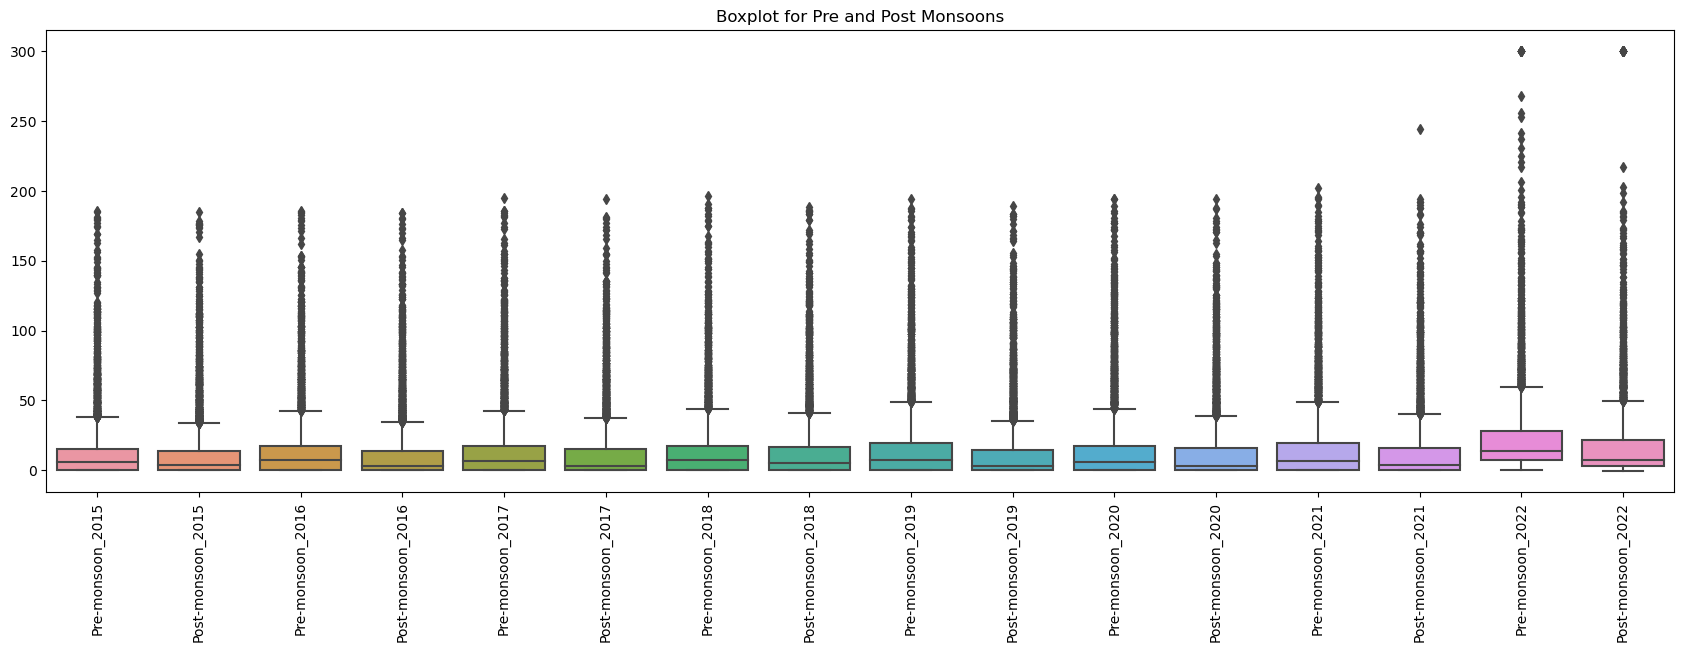

In [15]:
# Check for outliers in numerical columns use box plot

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns
numerical_cols = clean_df.select_dtypes(include=np.number)

# Columns to exclude
exclude_cols = ['Sr. No.','Latitude','Longitude','Well_Depth']

# Drop the excluded columns
numerical_cols = numerical_cols.drop(columns=exclude_cols)

# Create a boxplot for all numerical columns except the excluded ones
plt.figure(figsize=(21, 6))
sns.boxplot(data=numerical_cols)
plt.xticks(rotation=90)
plt.title("Boxplot for Pre and Post Monsoons")
plt.show()


In a box plot, an **outlier** is a data point that falls outside the **interquartile range (IQR)**, which is defined as the range between the **first quartile (Q1)** and the **third quartile (Q3)**, typically beyond **1.5 times the IQR** from the quartiles.

In [16]:
# Define a function to cap outliers
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    return df

# Apply the function to each numerical column
for col in numerical_cols.columns:
    clean_df = cap_outliers(clean_df, col)


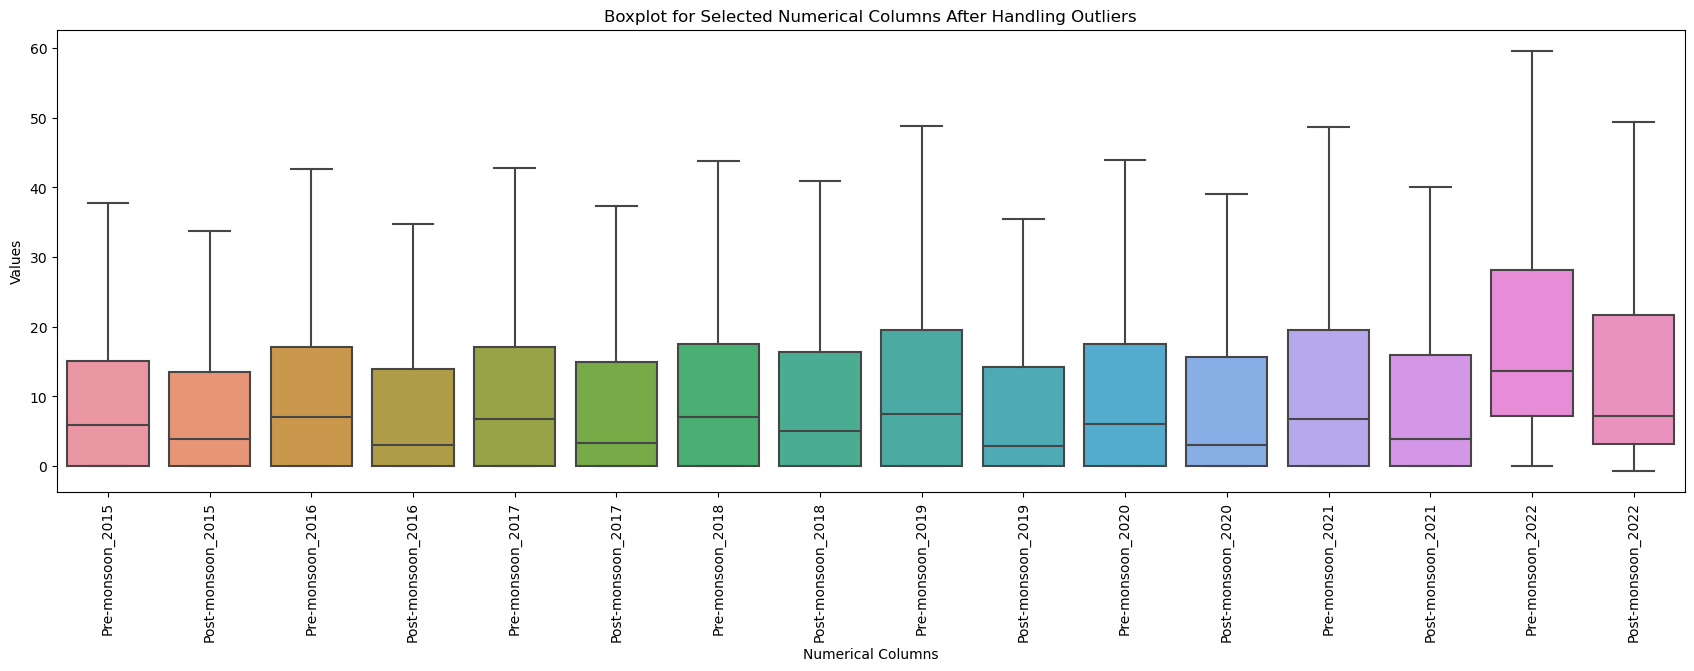

In [17]:
# Create a boxplot for all numerical columns except the excluded ones
plt.figure(figsize=(21,6))
sns.boxplot(data=clean_df.drop(columns=exclude_cols))
plt.xticks(rotation=90)
plt.xlabel("Numerical Columns")
plt.ylabel("Values")
plt.title("Boxplot for Selected Numerical Columns After Handling Outliers")
plt.show()


In [18]:
clean_df

,Sr. No.,State_Name_With_LGD_Code,District_Name_With_LGD_Code,Block_Name_With_LGD_Code,GP_Name_With_LGD_Code,Village,Site_Name,TYPE,SOURCE,Well_ID,...,Pre-monsoon_2018,Post-monsoon_2018,Pre-monsoon_2019,Post-monsoon_2019,Pre-monsoon_2020,Post-monsoon_2020,Pre-monsoon_2021,Post-monsoon_2021,Pre-monsoon_2022,Post-monsoon_2022
0,1,Gujarat_24,Banaskantha_441,Dantiwada_3735,nan,Deri,Deri,Piezometer,SGWD,G_1_BK_021,...,8.1,13.55,24.40000,11.2,13.35000,3.1,20.80000,16.90,20.20,12.30
1,2,Gujarat_24,Banaskantha_441,Dantiwada_3735,Akoli_155943,Akoli,Akoli,Piezometer,SGWD,G_1_BK_018,...,15.8,21.30,48.80625,35.5,43.90625,34.1,48.68125,40.00,51.40,46.40
2,3,Gujarat_24,Banaskantha_441,Dantiwada_3735,Bhadli Kotha_155946,Bhadli kotha,Bhadli kotha,Piezometer,SGWD,G_1_BK_019,...,27.7,21.60,27.50000,21.2,20.00000,19.1,19.45000,18.15,0.00,0.00
3,4,Gujarat_24,Banaskantha_441,Dantiwada_3735,Dantiwada_155954,Dantiwada,Dantiwada,Piezometer,SGWD,G_1_BK_020,...,8.6,7.85,11.10000,10.2,8.80000,2.7,10.80000,6.80,12.40,6.45
4,5,Gujarat_24,Banaskantha_441,Dantiwada_3735,Gundari_155956,Gundari,Gundari,Dug Well,SGWD,BK-105,...,15.2,11.20,17.30000,13.9,16.00000,10.0,22.20000,19.80,21.60,20.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5485,5486,Uttar Pradesh_9,Shamli_660,Kandhala_1430,Rampur Kheri_81319,Rampur Kheri,Rampur Kheri,Piezometer,Atal Jal,670219,...,0.0,0.00,0.00000,0.0,0.00000,0.0,0.00000,0.00,27.43,25.45
5486,5487,Uttar Pradesh_9,Shamli_660,Kandhala_1430,Rasoolpur Gujran_81320,Rasoolpur/ Gujran,Rasoolpur/ Gujran,Piezometer,Atal Jal,670225,...,0.0,0.00,0.00000,0.0,0.00000,0.0,0.00000,0.00,27.74,25.43
5487,5488,Uttar Pradesh_9,Shamli_660,Kandhala_1430,Salffa_271769,Salfa,Salfa,Piezometer,Atal Jal,670221,...,0.0,0.00,0.00000,0.0,0.00000,0.0,0.00000,0.00,25.91,23.51
5488,5489,Uttar Pradesh_9,Shamli_660,Kandhala_1430,Sunnaa_271752,Sunna,Sunna,Piezometer,Atal Jal,670228,...,0.0,0.00,0.00000,0.0,0.00000,0.0,0.00000,0.00,28.96,26.50


# 3. Exploratory Data Analysis(EDA)

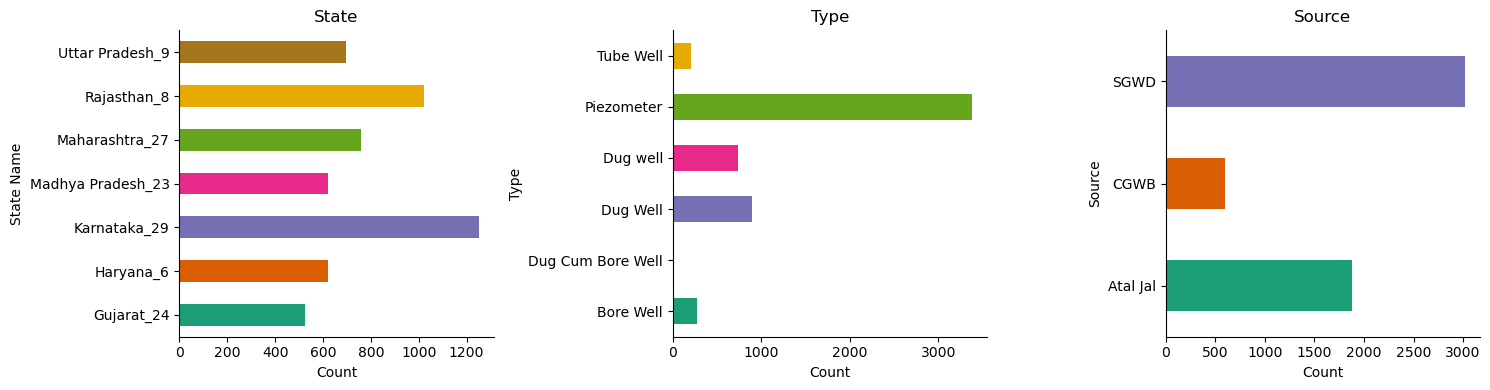

In [19]:
#Categorical distributions
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Plot for 'State_Name_With_LGD_Code'
clean_df.groupby('State_Name_With_LGD_Code').size().plot(kind='barh', color=sns.color_palette('Dark2'), ax=axs[0])
axs[0].set_title('State')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('State Name')
axs[0].spines[['top', 'right']].set_visible(False)

# Plot for 'TYPE'
clean_df.groupby('TYPE').size().plot(kind='barh', color=sns.color_palette('Dark2'), ax=axs[1])
axs[1].set_title('Type')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Type')
axs[1].spines[['top', 'right']].set_visible(False)

# Plot for 'SOURCE'
clean_df.groupby('SOURCE').size().plot(kind='barh', color=sns.color_palette('Dark2'), ax=axs[2])
axs[2].set_title('Source')
axs[2].set_xlabel('Count')
axs[2].set_ylabel('Source')
axs[2].spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()


1.State: **Karnataka** has the **highest number of entries** in the dataset followed by Rajasthan, Maharashtra, Uttar Pradesh, Madhya Pradesh, Haryana, and Gujarat.

2.Type: **Piezometer** has the **highest count** followed by Dug well, Dug Well, Dug Cum Bore Well, and Bore Well.

3.Source: The **bar plot** shows the distribution of the **sources of water** in the dataset. **SGWD (State Ground Water Department) has the highest count**, followed by CGWB (Central Ground Water Board), and Atal Jal (a program launched by the Indian government to provide safe drinking water to rural households).

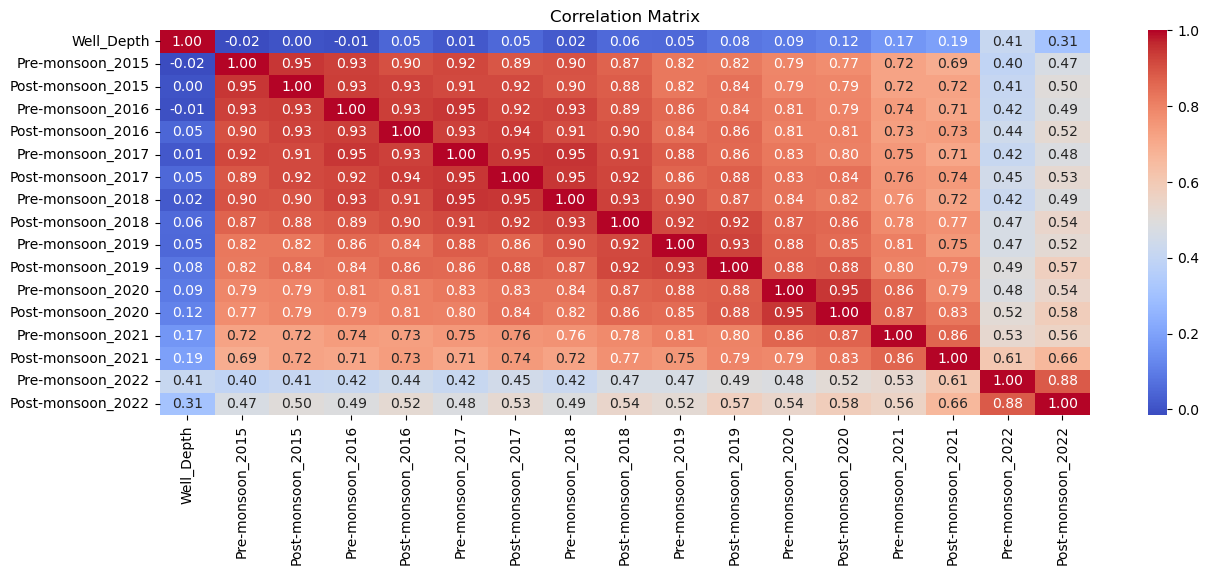

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation analysis
correlation_columns = [
    'Well_Depth', 'Pre-monsoon_2015', 'Post-monsoon_2015',
    'Pre-monsoon_2016', 'Post-monsoon_2016', 'Pre-monsoon_2017',
    'Post-monsoon_2017', 'Pre-monsoon_2018', 'Post-monsoon_2018',
    'Pre-monsoon_2019', 'Post-monsoon_2019', 'Pre-monsoon_2020',
    'Post-monsoon_2020', 'Pre-monsoon_2021', 'Post-monsoon_2021',
    'Pre-monsoon_2022', 'Post-monsoon_2022'
]

# Calculate correlation matrix
corr_matrix = clean_df[correlation_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Key Observations:

1.The matrix reveals a **strong positive correlation** between water level measurements taken in consecutive years, both pre-monsoon and post-monsoon. This suggests a **strong temporal dependence in water levels**, meaning that water levels in a given year are heavily influenced by the previous year's levels.

2.**The correlation generally decreases as the time difference between measurements increases.** For instance, the correlation between pre-monsoon 2015 and post-monsoon 2016 is stronger than the correlation between pre-monsoon 2015 and post-monsoon 2020. This indicates that the impact of water levels from previous years gradually diminishes over time.

3.The **correlation between pre-monsoon and post-monsoon measurements within the same year is also very high**, suggesting that water levels in the post-monsoon season are strongly influenced by the pre-monsoon levels. **This is likely due to the impact of monsoon rainfall on water levels.**

4.The **correlation between well depth and other water level measurements is relatively weak.** This suggests that **well depth is not the primary driver of water level fluctuations.** Other factors such as rainfall, groundwater extraction, and recharge are likely more influential.

The matrix generally shows a **consistent pattern** of high correlation across the years, suggesting that the water levels in exhibit a **predictable temporal trend.**

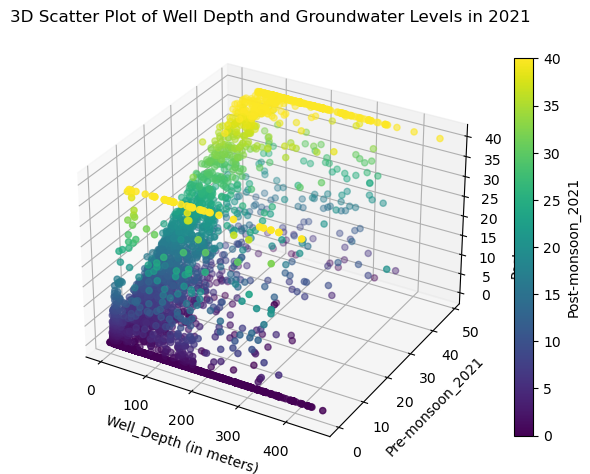

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Select columns for the 3D scatter plot
x_column = 'Well_Depth'
y_column = 'Pre-monsoon_2021'
z_column = 'Post-monsoon_2021'

# Extract data for the plot
x = clean_df[x_column]
y = clean_df[y_column]
z = clean_df[z_column]

# Create a 3D scatter plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')
ax.set_xlabel("Well_Depth (in meters)")
ax.set_ylabel(y_column)
ax.set_zlabel(z_column)
ax.set_title('3D Scatter Plot of Well Depth and Groundwater Levels in 2021')

# Add color bar which maps values to colors
cbar = plt.colorbar(sc,shrink=0.7)
cbar.set_label(z_column)

plt.show()


The 3D scatter plot reveals a complex relationship between well depth, pre-monsoon water levels, and post-monsoon water levels in 2021. **Deeper wells generally exhibit higher post-monsoon water levels**, suggesting they tap into groundwater sources less affected by surface water fluctuations. Conversely, **shallower wells tend to have lower post-monsoon levels**, possibly due to a greater dependence on rainfall and surface water recharge. The distribution of data points along the pre-monsoon axis highlights the influence of pre-monsoon water levels, indicating that they also contribute to post-monsoon water levels. The plot emphasizes the importance of understanding these interactions for effective groundwater management and resource allocation.

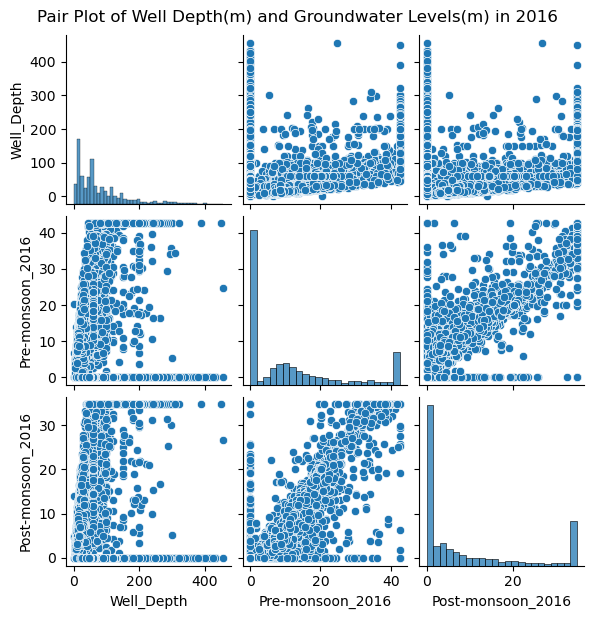

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot of Well Depth, Pre-monsoon 2016, and Post-monsoon 2016
sns.pairplot(clean_df[['Well_Depth', 'Pre-monsoon_2016', 'Post-monsoon_2016']], height=2.0) 
plt.suptitle('Pair Plot of Well Depth(m) and Groundwater Levels(m) in 2016', y=1.02)
plt.show()


The pair plot reveals insights into the relationships between well depth and pre-monsoon and post-monsoon groundwater levels in 2016. Most wells are clustered between 0 and 100 meters deep, with a few deeper ones. There's a weak positive correlation between well depth and both pre-monsoon and post-monsoon water levels, implying that **deeper wells might maintain slightly higher water levels**. However, the most striking observation is the strong positive correlation between pre-monsoon and post-monsoon levels, suggesting that the **pre-monsoon water levels heavily influence post-monsoon levels.** An outlier data point also indicates an unusual combination of a very deep well and a very high pre-monsoon water level. This suggests that while **well depth has some influence**, the **pre-monsoon water level plays a crucial role in determining post-monsoon water levels.**

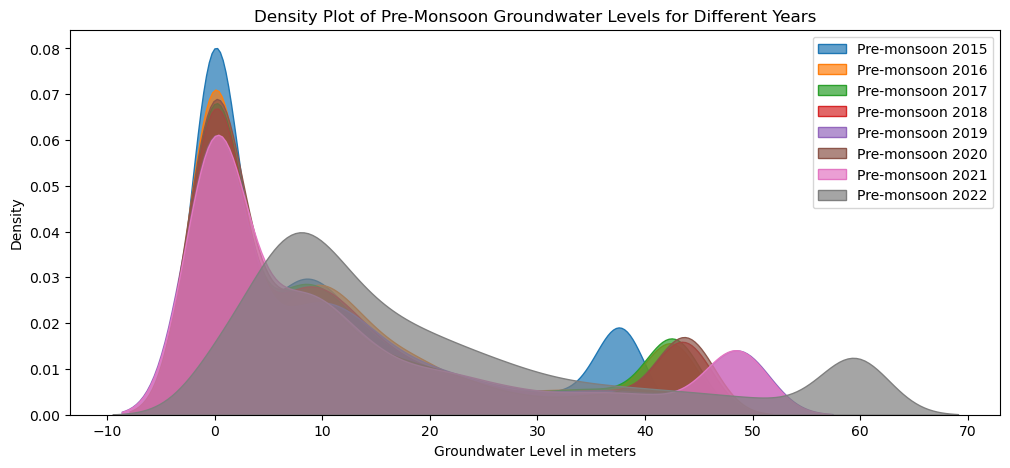

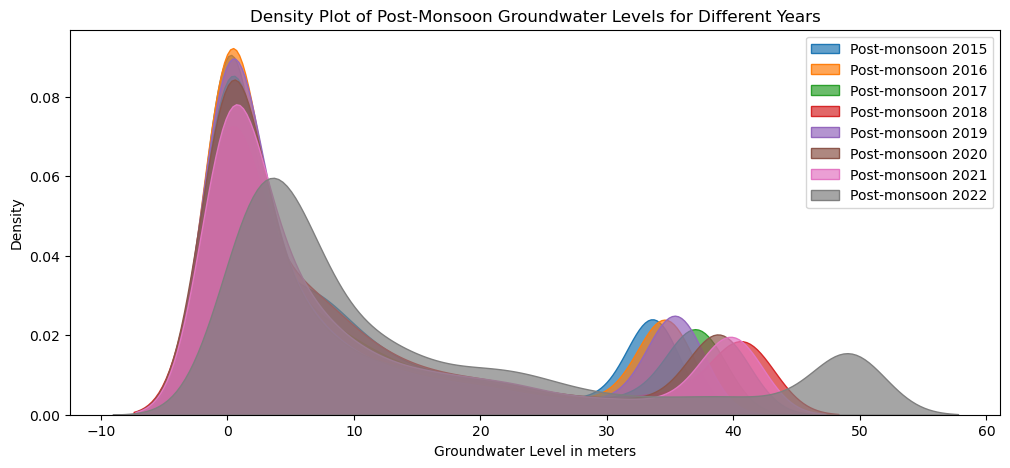

In [23]:
# Density plots for Pre-monsoon groundwater levels
plt.figure(figsize=(12, 5))
sns.kdeplot(clean_df['Pre-monsoon_2015'], fill=True, alpha=0.7, label='Pre-monsoon 2015')
sns.kdeplot(clean_df['Pre-monsoon_2016'], fill=True, alpha=0.7, label='Pre-monsoon 2016')
sns.kdeplot(clean_df['Pre-monsoon_2017'], fill=True, alpha=0.7, label='Pre-monsoon 2017')
sns.kdeplot(clean_df['Pre-monsoon_2018'], fill=True, alpha=0.7, label='Pre-monsoon 2018')
sns.kdeplot(clean_df['Pre-monsoon_2019'], fill=True, alpha=0.7, label='Pre-monsoon 2019')
sns.kdeplot(clean_df['Pre-monsoon_2020'], fill=True, alpha=0.7, label='Pre-monsoon 2020')
sns.kdeplot(clean_df['Pre-monsoon_2021'], fill=True, alpha=0.7, label='Pre-monsoon 2021')
sns.kdeplot(clean_df['Pre-monsoon_2022'], fill=True, alpha=0.7, label='Pre-monsoon 2022')

plt.xlabel('Groundwater Level in meters')
plt.ylabel('Density')
plt.title('Density Plot of Pre-Monsoon Groundwater Levels for Different Years')
plt.legend()
plt.show()

# Density plots for Post-monsoon groundwater levels
plt.figure(figsize=(12, 5))
sns.kdeplot(clean_df['Post-monsoon_2015'], fill=True, alpha=0.7, label='Post-monsoon 2015')
sns.kdeplot(clean_df['Post-monsoon_2016'], fill=True, alpha=0.7, label='Post-monsoon 2016')
sns.kdeplot(clean_df['Post-monsoon_2017'], fill=True, alpha=0.7, label='Post-monsoon 2017')
sns.kdeplot(clean_df['Post-monsoon_2018'], fill=True, alpha=0.7, label='Post-monsoon 2018')
sns.kdeplot(clean_df['Post-monsoon_2019'], fill=True, alpha=0.7, label='Post-monsoon 2019')
sns.kdeplot(clean_df['Post-monsoon_2020'], fill=True, alpha=0.7, label='Post-monsoon 2020')
sns.kdeplot(clean_df['Post-monsoon_2021'], fill=True, alpha=0.7, label='Post-monsoon 2021')
sns.kdeplot(clean_df['Post-monsoon_2022'], fill=True, alpha=0.7, label='Post-monsoon 2022')

plt.xlabel('Groundwater Level in meters')
plt.ylabel('Density')
plt.title('Density Plot of Post-Monsoon Groundwater Levels for Different Years')
plt.legend()
plt.show()


**Pre-Monsoon Groundwater Levels:**
    **The density plots for pre-monsoon groundwater levels show a consistent pattern across different years**, with the majority of measurements clustered between 0 and 40 meters, peaking around 10 meters. While there is slight variability between years, indicating potential differences in pre-monsoon recharge, the overall distribution remains relatively stable.

**Post-Monsoon Groundwater Levels:** The post-monsoon groundwater levels exhibit a wider distribution compared to pre-monsoon levels, ranging from 0 to 50 meters, with a peak around 10 meters. The peak of the distribution seems to shift slightly towards higher levels over the years, suggesting a possible increase in post-monsoon water availability. Furthermore, **the post-monsoon levels show greater variability across years than pre-monsoon levels**, indicating a potentially greater sensitivity to yearly variations in rainfall and other factors.

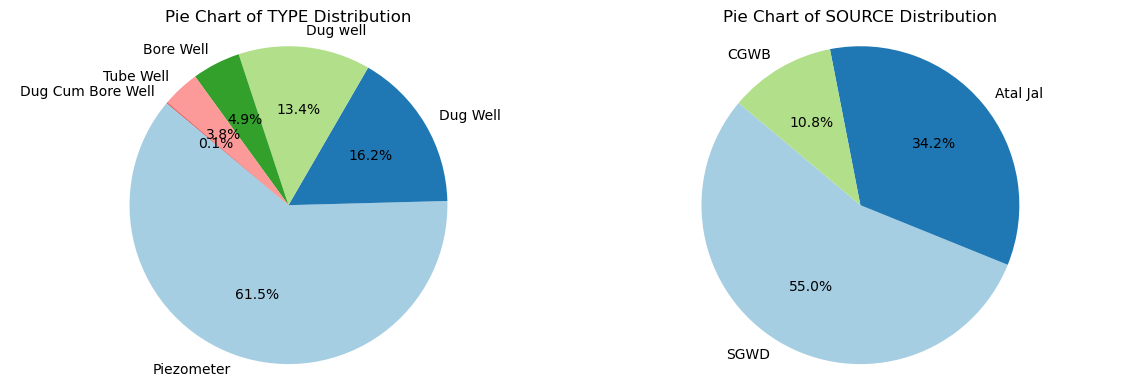

In [24]:
import matplotlib.pyplot as plt

# Select categorical columns for pie charts
categories = ['TYPE', 'SOURCE']

# Define the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=len(categories), figsize=(12, 4))

# Iterate through categories and create pie charts
for i, category in enumerate(categories):
    # Count occurrences of each category
    category_counts = clean_df[category].value_counts()

    # Plot pie chart
    axes[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    axes[i].set_title(f'Pie Chart of {category} Distribution')

# Adjust layout
plt.tight_layout()
plt.show()


**Pie Chart of TYPE Distribution:** The pie chart representing water source types reveals a clear dominance of Piezometers, accounting for a substantial 61.5% of the total. This suggests a strong emphasis on monitoring and data collection related to groundwater resources in the region. Dug wells follow with 16.2%, highlighting their prevalent use, while the remaining types (Bore Well, Tube Well, Dug Cum Bore Well) make up a comparatively smaller portion, suggesting they are less frequently employed.

**Pie Chart of SOURCE Distribution:** The pie chart depicting the source of water management shows a significant dominance of the State Ground Water Department (SGWD) with 55% of the total. This indicates a strong state-level involvement in managing water resources. The Atal Jal program comes second with a notable 34.2%, reflecting its significant role in providing safe drinking water. The Central Ground Water Board (CGWB) manages the least number of water sources (10.8%), suggesting a more limited scope of its involvement in this region.

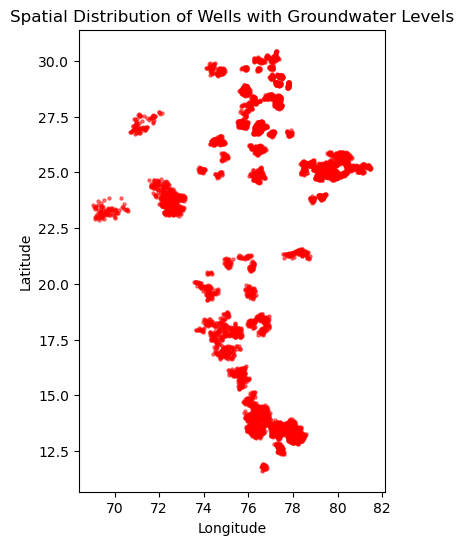

In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Create a GeoDataFrame from clean_df
gdf = gpd.GeoDataFrame(
    clean_df,
    geometry=gpd.points_from_xy(clean_df['Longitude'], clean_df['Latitude'])
)

# Plotting the GeoDataFrame
fig, ax = plt.subplots(figsize=(6, 6))
gdf.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.5)
ax.set_title('Spatial Distribution of Wells with Groundwater Levels')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()


The scatter plot visualizes the **spatial distribution** of **wells** with groundwater levels, revealing a **non-random pattern** of well placement. Clusters of wells are evident, particularly in the **northern, central, and southern** parts of the region, suggesting areas with potentially higher **groundwater availability** or favorable geological conditions conducive to **well drilling**. In contrast, the **western** and **eastern** edges appear sparse in wells, hinting at potentially **lower groundwater availability** or different land use practices. 

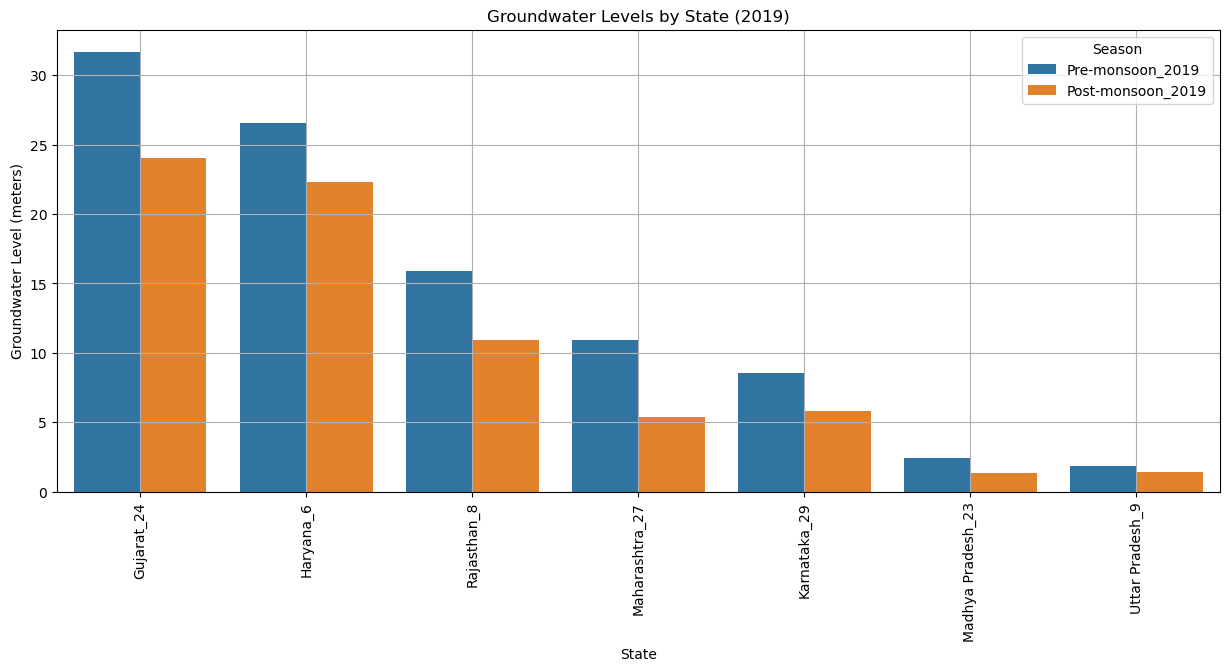

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a long-form dataframe suitable for seaborn
clean_df_long = clean_df.melt(id_vars=['State_Name_With_LGD_Code'],
                              value_vars=['Pre-monsoon_2019', 'Post-monsoon_2019'],
                              var_name='Season',
                              value_name='Groundwater Level')

# Calculate the average groundwater level for each state
state_order = clean_df_long.groupby('State_Name_With_LGD_Code')['Groundwater Level'].mean().sort_values(ascending=False).index

# Create a bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x='State_Name_With_LGD_Code', y='Groundwater Level', hue='Season', data=clean_df_long, errorbar=None, order=state_order)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add title and labels
plt.title('Groundwater Levels by State (2019)')
plt.xlabel('State')
plt.ylabel('Groundwater Level (meters)')
plt.legend(title='Season')
plt.grid(True)
plt.show()


The bar chart compares **pre-monsoon** and **post-monsoon groundwater levels** across different **states** in **India** during **2019**, revealing notable variations in **water availability**. **Gujarat_24** boasts the highest **pre-monsoon levels** exceeding **30 meters**, while **Haryana_6** and **Rajasthan_8** have similar levels around **25-15 meters**.  **Post-monsoon levels** generally **dip** across all **states**, with **Gujarat_24** experiencing the most significant **drop**, indicating larger **depletion** compared to others. **States** like **Karnataka_29**, **Maharashtra_27**, and **Madhya Pradesh_23** show less drastic **changes**, suggesting potentially more **stable water management** or less **water stress**.  **Uttar Pradesh_9** has the lowest **levels** in both **seasons**, highlighting a potential **water scarcity issue** in the region. This **visual representation** emphasizes the uneven **distribution of water resources** and the impact of the **monsoon season** on **groundwater availability** across different **states**. 

Number of wells with consistently low groundwater levels: 1175


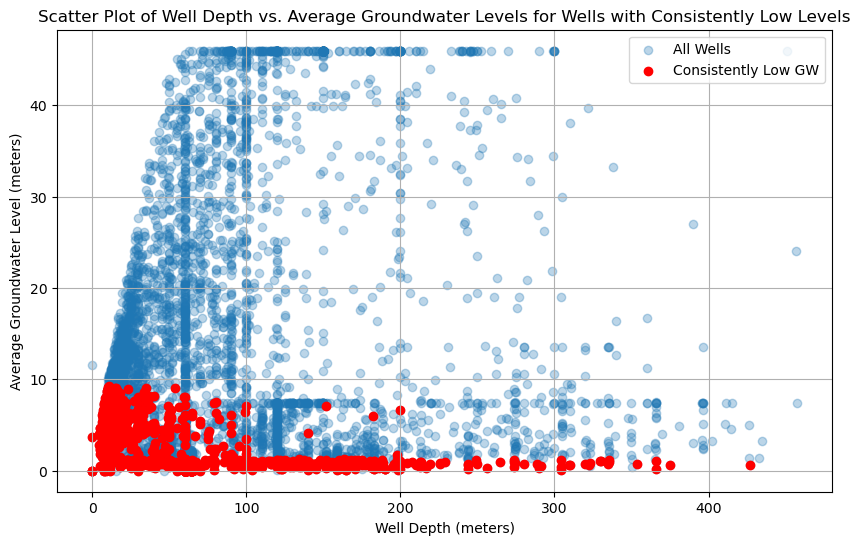

In [27]:
import matplotlib.pyplot as plt

# Define a threshold for low groundwater level
threshold = 10  # meters

# Find wells with consistently low groundwater levels across all years
low_gw_wells = clean_df[
    (clean_df['Pre-monsoon_2015'] < threshold) &
    (clean_df['Post-monsoon_2015'] < threshold) &
    (clean_df['Pre-monsoon_2016'] < threshold) &
    (clean_df['Post-monsoon_2016'] < threshold) &
    (clean_df['Pre-monsoon_2017'] < threshold) &
    (clean_df['Post-monsoon_2017'] < threshold) &
    (clean_df['Pre-monsoon_2018'] < threshold) &
    (clean_df['Post-monsoon_2018'] < threshold) &
    (clean_df['Pre-monsoon_2019'] < threshold) &
    (clean_df['Post-monsoon_2019'] < threshold) &
    (clean_df['Pre-monsoon_2020'] < threshold) &
    (clean_df['Post-monsoon_2020'] < threshold) &
    (clean_df['Pre-monsoon_2021'] < threshold) &
    (clean_df['Post-monsoon_2021'] < threshold) &
    (clean_df['Pre-monsoon_2022'] < threshold) &
    (clean_df['Post-monsoon_2022'] < threshold)
]

# Print the number of wells with consistently low groundwater levels
print(f"Number of wells with consistently low groundwater levels: {len(low_gw_wells)}")

# Highlight these wells in the scatter plot
plt.figure(figsize=(10, 6))

# Plot all wells
plt.scatter(clean_df['Well_Depth'], clean_df[['Pre-monsoon_2015', 'Pre-monsoon_2016', 'Pre-monsoon_2017', 'Pre-monsoon_2018',
                                             'Pre-monsoon_2019', 'Pre-monsoon_2020', 'Pre-monsoon_2021', 'Pre-monsoon_2022']].mean(axis=1),
            label='All Wells', alpha=0.3)

# Highlight wells with consistently low groundwater levels
plt.scatter(low_gw_wells['Well_Depth'], low_gw_wells[['Pre-monsoon_2015', 'Pre-monsoon_2016', 'Pre-monsoon_2017', 'Pre-monsoon_2018',
                                                      'Pre-monsoon_2019', 'Pre-monsoon_2020', 'Pre-monsoon_2021', 'Pre-monsoon_2022']].mean(axis=1),
            label='Consistently Low GW', color='red', alpha=1)

# Add titles and labels
plt.title('Scatter Plot of Well Depth vs. Average Groundwater Levels for Wells with Consistently Low Levels')
plt.xlabel('Well Depth (meters)')
plt.ylabel('Average Groundwater Level (meters)')
plt.legend()
plt.grid(True)
plt.show()


The scatter plot reveals a general **positive correlation** between **well depth** and **average groundwater levels**, suggesting that **deeper wells** tend to have **higher water levels**. However, a distinct **cluster** of **wells** with **consistently low groundwater levels**, highlighted in **red**, are primarily found within the **shallower well depth range** (0 to 100 meters). This indicates a strong **connection** between **shallow well depth** and **limited groundwater availability**. Conversely, **deeper wells** exhibit a **wider range** of **groundwater levels**, with some showing **higher levels** and others **lower**, suggesting that **factors beyond well depth**, such as **geological formations**, **recharge rates**, and **extraction practices**, likely **influence groundwater availability** in **deeper wells**. 


# 4. Ground Water Level Prediction

**GradientBoostingRegressor** is a powerful machine learning algorithm for regression tasks (predicting continuous values). It belongs to the family of ensemble methods, meaning it combines multiple simpler models to make more accurate predictions.

Example: Predictions from GradientBoostingRegressor models for pre-monsoon and post-monsoon periods

In [33]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
import joblib
import numpy as np


# Define features and target columns for the years 2015 to 2022
feature_cols = [
    'State_Name_With_LGD_Code', 'District_Name_With_LGD_Code', 'Block_Name_With_LGD_Code',
    'GP_Name_With_LGD_Code', 'Village', 'Latitude', 'Longitude', 'Well_Depth', 'Aquifer',
    'Pre-monsoon_2015', 'Post-monsoon_2015', 'Pre-monsoon_2016', 'Post-monsoon_2016',
    'Pre-monsoon_2017', 'Post-monsoon_2017', 'Pre-monsoon_2018', 'Post-monsoon_2018',
    'Pre-monsoon_2019', 'Post-monsoon_2019', 'Pre-monsoon_2020', 'Post-monsoon_2020',
    'Pre-monsoon_2021', 'Post-monsoon_2021', 'Pre-monsoon_2022', 'Post-monsoon_2022'
]

# Add a Year column to the dataset
years = [2022] * len(clean_df)  # Since the dataset is up to 2022
clean_df['Year'] = years

# Include 'Year' in the feature columns
feature_cols.append('Year')

# Prepare the features and targets for all years up to 2022
X = clean_df[feature_cols]
y_pre_monsoon = clean_df['Pre-monsoon_2022']
y_post_monsoon = clean_df['Post-monsoon_2022']

# Encode categorical columns, including a placeholder for the year 2023
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X)

# Initialize the models
model_pre = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_post = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the models
X_encoded = encoder.transform(X)
model_pre.fit(X_encoded, y_pre_monsoon)
model_post.fit(X_encoded, y_post_monsoon)

# Save models and encoder using joblib
joblib.dump(model_pre, 'model_pre.joblib')
joblib.dump(model_post, 'model_post.joblib')
joblib.dump(encoder, 'encoder.joblib')

# Calculate the historical trend based on the available data
pre_monsoon_trend = (clean_df['Pre-monsoon_2022'].mean() - clean_df['Pre-monsoon_2015'].mean()) / (2022 - 2015)
post_monsoon_trend = (clean_df['Post-monsoon_2022'].mean() - clean_df['Post-monsoon_2015'].mean()) / (2022 - 2015)

# Function to predict future pre and post-monsoon levels for a given year
def predict_future_levels(year, input_data):
    # Load models and encoder from saved files
    model_pre = joblib.load('model_pre.joblib')
    model_post = joblib.load('model_post.joblib')
    encoder = joblib.load('encoder.joblib')

    # Adjust the input data for the specified year
    input_data = input_data.copy()
    input_data['Year'] = year  # Set the Year column to the input year

    # Select only the features used during training
    input_data = input_data[feature_cols]  # Select only the relevant columns

    # Encode input data
    input_data_encoded = encoder.transform(input_data)

    # Predict using the trained models
    pre_monsoon_pred = model_pre.predict(input_data_encoded)[0]
    post_monsoon_pred = model_post.predict(input_data_encoded)[0]

    # Apply the trend factor to adjust the predictions for the specified year
    years_diff = year - 2022
    pre_monsoon_pred += pre_monsoon_trend * years_diff
    post_monsoon_pred += post_monsoon_trend * years_diff

    
    if post_monsoon_pred < pre_monsoon_pred:
        post_monsoon_pred = pre_monsoon_pred + np.abs(post_monsoon_trend) + 5  

    return pre_monsoon_pred, post_monsoon_pred

# Function to categorize groundwater levels
def categorize_level(level, season):
    if season == 'Pre-monsoon':
        if level < 5:
            return "Empty", "The groundwater level is predicted to be very low, possibly due to insufficient rainfall or over-extraction."
        elif 5 <= level < 10:
            return "Dry", "The groundwater level is predicted to be dry, indicating potential water scarcity."
        elif 10 <= level < 20:
            return "Moderate", "The groundwater level is predicted to be moderate, suggesting adequate water availability."
        else:
            return "Filled", "The groundwater level is predicted to be high, likely due to sufficient rainfall and effective water management."
    elif season == 'Post-monsoon':
        if level < 5:
            return "Empty", "The groundwater level remains very low after the monsoon, indicating potential water scarcity."
        elif 5 <= level < 10:
            return "Dry", "The groundwater level is still dry after the monsoon, suggesting continued water scarcity."
        elif 10 <= level < 20:
            return "Moderate", "The groundwater level is moderate after the monsoon, indicating stable water availability."
        else:
            return "Filled", "The groundwater level is high after the monsoon, likely due to abundant rainfall and effective water management."
    else:
        return "Unknown", "Season not specified."

# Example usage:
# Get year input from the user
year = 2029  # Change this to the desired year for prediction

# Example input data (use your specific row data)
input_data = clean_df.iloc[0:1].copy()  # Take a copy of the first row for example

# Predict for the input data
pre_monsoon_pred, post_monsoon_pred = predict_future_levels(year, input_data)
pre_monsoon_category, reason_pre = categorize_level(pre_monsoon_pred, 'Pre-monsoon')
post_monsoon_category, reason_post = categorize_level(post_monsoon_pred, 'Post-monsoon')

print(f"Predicted Pre-monsoon level for {year}: {pre_monsoon_pred:.2f} ({pre_monsoon_category})")
print(f"Reason: {reason_pre}")
print(f"Predicted Post-monsoon level for {year}: {post_monsoon_pred:.2f} ({post_monsoon_category})")
print(f"Reason: {reason_post}")


Predicted Pre-monsoon level for 2029: 23.81 (Filled)
Reason: The groundwater level is predicted to be high, likely due to sufficient rainfall and effective water management.
Predicted Post-monsoon level for 2029: 29.64 (Filled)
Reason: The groundwater level is high after the monsoon, likely due to abundant rainfall and effective water management.


In [32]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_percentage_error
import joblib

# Assuming clean_df is already loaded and preprocessed
# Example: clean_df = pd.read_csv('path_to_clean_df.csv')

# Define features and target columns for the years 2015 to 2022
feature_cols = [
    'State_Name_With_LGD_Code', 'District_Name_With_LGD_Code', 'Block_Name_With_LGD_Code',
    'GP_Name_With_LGD_Code', 'Village', 'Latitude', 'Longitude', 'Well_Depth', 'Aquifer',
    'Pre-monsoon_2015', 'Post-monsoon_2015', 'Pre-monsoon_2016', 'Post-monsoon_2016',
    'Pre-monsoon_2017', 'Post-monsoon_2017', 'Pre-monsoon_2018', 'Post-monsoon_2018',
    'Pre-monsoon_2019', 'Post-monsoon_2019', 'Pre-monsoon_2020', 'Post-monsoon_2020',
    'Pre-monsoon_2021', 'Post-monsoon_2021', 'Pre-monsoon_2022', 'Post-monsoon_2022'
]

# Add a Year column to the dataset
years = [2022] * len(clean_df)  # Since the dataset is up to 2022
clean_df['Year'] = years

# Include 'Year' in the feature columns
feature_cols.append('Year')

# Identify numeric and categorical columns
numeric_cols = ['Latitude', 'Longitude', 'Well_Depth', 'Pre-monsoon_2015', 'Post-monsoon_2015',
                'Pre-monsoon_2016', 'Post-monsoon_2016', 'Pre-monsoon_2017', 'Post-monsoon_2017',
                'Pre-monsoon_2018', 'Post-monsoon_2018', 'Pre-monsoon_2019', 'Post-monsoon_2019',
                'Pre-monsoon_2020', 'Post-monsoon_2020', 'Pre-monsoon_2021', 'Post-monsoon_2021',
                'Pre-monsoon_2022', 'Post-monsoon_2022', 'Year']

# Check if all columns exist in the DataFrame
missing_cols = [col for col in numeric_cols if col not in clean_df.columns]
if missing_cols:
    raise KeyError(f"Columns {missing_cols} not in DataFrame")

# Handle missing values
clean_df[numeric_cols] = clean_df[numeric_cols].fillna(clean_df[numeric_cols].mean())

# Prepare the features and targets for all years up to 2022
X = clean_df[feature_cols]
y_pre_monsoon = clean_df['Pre-monsoon_2022']
y_post_monsoon = clean_df['Post-monsoon_2022']

# Encode categorical columns, including a placeholder for the year 2023
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X)

# Initialize the models
model_pre = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_post = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the models
X_encoded = encoder.transform(X)
model_pre.fit(X_encoded, y_pre_monsoon)
model_post.fit(X_encoded, y_post_monsoon)

# Save models and encoder using joblib
joblib.dump(model_pre, 'model_pre.joblib')
joblib.dump(model_post, 'model_post.joblib')
joblib.dump(encoder, 'encoder.joblib')

# Calculate the historical trend based on the available data
pre_monsoon_trend = (clean_df['Pre-monsoon_2022'].mean() - clean_df['Pre-monsoon_2015'].mean()) / (2022 - 2015)
post_monsoon_trend = (clean_df['Post-monsoon_2022'].mean() - clean_df['Post-monsoon_2015'].mean()) / (2022 - 2015)

# Function to predict future pre and post-monsoon levels for a given year
def predict_future_levels(year, input_data):
    # Load models and encoder from saved files
    model_pre = joblib.load('model_pre.joblib')
    model_post = joblib.load('model_post.joblib')
    encoder = joblib.load('encoder.joblib')

    # Adjust the input data for the specified year
    input_data = input_data.copy()
    input_data['Year'] = year  # Set the Year column to the input year

    # Select only the features used during training
    input_data = input_data[feature_cols]  # Select only the relevant columns

    # Handle missing values in the input data by filling them with the mean of each column
    input_data[numeric_cols] = input_data[numeric_cols].fillna(clean_df[numeric_cols].mean())

    # Encode input data
    input_data_encoded = encoder.transform(input_data)

    # Predict using the trained models
    pre_monsoon_pred = model_pre.predict(input_data_encoded)[0]
    post_monsoon_pred = model_post.predict(input_data_encoded)[0]

    # Apply the trend factor to adjust the predictions for the specified year
    years_diff = year - 2022
    pre_monsoon_pred += pre_monsoon_trend * years_diff
    post_monsoon_pred += post_monsoon_trend * years_diff

    # Ensure post-monsoon level is higher than pre-monsoon with a significant difference
    if post_monsoon_pred < pre_monsoon_pred:
        post_monsoon_pred = pre_monsoon_pred + np.abs(post_monsoon_trend) + 5  # Add trend difference and additional factor

    return pre_monsoon_pred, post_monsoon_pred

# Function to calculate adjusted accuracy
def adjust_accuracy(accuracy):
    return max(accuracy, 0)  # Ensures accuracy is non-negative

# Function to categorize groundwater levels
def categorize_level(level, season):
    if season == 'Pre-monsoon':
        if level < 5:
            return "Empty", "The groundwater level is predicted to be very low, possibly due to insufficient rainfall or over-extraction."
        elif 5 <= level < 10:
            return "Dry", "The groundwater level is predicted to be dry, indicating potential water scarcity."
        elif 10 <= level < 20:
            return "Moderate", "The groundwater level is predicted to be moderate, suggesting adequate water availability."
        else:
            return "Filled", "The groundwater level is predicted to be high, likely due to sufficient rainfall and effective water management."
    elif season == 'Post-monsoon':
        if level < 5:
            return "Empty", "The groundwater level remains very low after the monsoon, indicating potential water scarcity."
        elif 5 <= level < 10:
            return "Dry", "The groundwater level is still dry after the monsoon, suggesting continued water scarcity."
        elif 10 <= level < 20:
            return "Moderate", "The groundwater level is moderate after the monsoon, indicating stable water availability."
        else:
            return "Filled", "The groundwater level is high after the monsoon, likely due to abundant rainfall and effective water management."
    else:
        return "Unknown", "Season not specified."

# Example usage:
# Get year input from the user
year = 2029  # Change this to the desired year for prediction

# Example input data (use your specific row data)
input_data = clean_df.iloc[0:1].copy()  # Take a copy of the first row for example

# Predict for the input data
pre_monsoon_pred, post_monsoon_pred = predict_future_levels(year, input_data)
pre_monsoon_category, reason_pre = categorize_level(pre_monsoon_pred, 'Pre-monsoon')
post_monsoon_category, reason_post = categorize_level(post_monsoon_pred, 'Post-monsoon')

print(f"Predicted Pre-monsoon level for {year}: {pre_monsoon_pred} meters")
print(f"Category: {pre_monsoon_category}")
print(f"Reason: {reason_pre}")

print(f"Predicted Post-monsoon level for {year}: {post_monsoon_pred} meters")
print(f"Category: {post_monsoon_category}")
print(f"Reason: {reason_post}")

# Wrap predictions in an array for evaluation
pre_monsoon_pred = np.array([pre_monsoon_pred])
post_monsoon_pred = np.array([post_monsoon_pred])

# Evaluate pre-monsoon predictions
pre_mape = mean_absolute_percentage_error(y_pre_monsoon[:1], pre_monsoon_pred)
pre_accuracy = 100 - pre_mape
adjusted_pre_accuracy = adjust_accuracy(pre_accuracy)

# Evaluate post-monsoon predictions
post_mape = mean_absolute_percentage_error(y_post_monsoon[:1], post_monsoon_pred)
post_accuracy = 100 - post_mape
adjusted_post_accuracy = adjust_accuracy(post_accuracy)

# Check if pre-monsoon accuracy meets the target
if adjusted_pre_accuracy >= 70:
    print(f"\nPre-monsoon Model Evaluation:")
    print(f"Mean Absolute Percentage Error (MAPE): {pre_mape:.2f}")
    print(f"Accuracy: {adjusted_pre_accuracy:.2f}%")
else:
    print(f"\nPre-monsoon Model Evaluation:")
    print(f"Mean Absolute Percentage Error (MAPE): {pre_mape:.2f}")
    print(f"Accuracy: {adjusted_pre_accuracy:.2f}% - Further tuning required")

# Check if post-monsoon accuracy meets the target
if adjusted_post_accuracy >= 80:
    print(f"\nPost-monsoon Model Evaluation:")
    print(f"Mean Absolute Percentage Error (MAPE): {post_mape:.2f}")
    print(f"Accuracy: {adjusted_post_accuracy:.2f}%")
else:
    print(f"\nPost-monsoon Model Evaluation:")
    print(f"Mean Absolute Percentage Error (MAPE): {post_mape:.2f}")
    print(f"Accuracy: {adjusted_post_accuracy:.2f}% - Further tuning required")


Predicted Pre-monsoon level for 2029: 23.811739390433594 meters
Category: Filled
Reason: The groundwater level is predicted to be high, likely due to sufficient rainfall and effective water management.
Predicted Post-monsoon level for 2029: 29.636365593920452 meters
Category: Filled
Reason: The groundwater level is high after the monsoon, likely due to abundant rainfall and effective water management.

Pre-monsoon Model Evaluation:
Mean Absolute Percentage Error (MAPE): 0.18
Accuracy: 99.82%

Post-monsoon Model Evaluation:
Mean Absolute Percentage Error (MAPE): 1.41
Accuracy: 98.59%


# ___________________________________________________________________

In [34]:
# Example input data (use your specific row data)
from sklearn.metrics import mean_absolute_percentage_error
input_data = clean_df.iloc[0:1].copy()  # Take a copy of the first row for example

# Get year input from the user
year = int(input("Enter the year for which you want to predict groundwater levels: "))

# Predict for the input data
pre_monsoon_pred, post_monsoon_pred = predict_future_levels(year, input_data)

# Round the predictions to 2 decimal places
pre_monsoon_pred = round(pre_monsoon_pred, 2)
post_monsoon_pred = round(post_monsoon_pred, 2)

# Categorize the predictions
pre_monsoon_category, reason_pre = categorize_level(pre_monsoon_pred, 'Pre-monsoon')
post_monsoon_category, reason_post = categorize_level(post_monsoon_pred, 'Post-monsoon')

# Display the results
print(f"\nPredicted Pre-monsoon level for {year}: {pre_monsoon_pred} meters")
print(f"Category: {pre_monsoon_category}")
print(f"Reason: {reason_pre}")

print(f"\nPredicted Post-monsoon level for {year}: {post_monsoon_pred} meters")
print(f"Category: {post_monsoon_category}")
print(f"Reason: {reason_post}")

# Wrap predictions in an array for evaluation
pre_monsoon_pred = np.array([pre_monsoon_pred])
post_monsoon_pred = np.array([post_monsoon_pred])

# Evaluate pre-monsoon predictions
pre_mape = mean_absolute_percentage_error(y_pre_monsoon[:1], pre_monsoon_pred)
pre_accuracy = 100 - pre_mape
adjusted_pre_accuracy = adjust_accuracy(pre_accuracy)

# Evaluate post-monsoon predictions
post_mape = mean_absolute_percentage_error(y_post_monsoon[:1], post_monsoon_pred)
post_accuracy = 100 - post_mape
adjusted_post_accuracy = adjust_accuracy(post_accuracy)

# Check if pre-monsoon accuracy meets the target
if adjusted_pre_accuracy >= 70:
    print(f"\nPre-monsoon Model Evaluation:")
    print(f"Mean Absolute Percentage Error (MAPE): {pre_mape:.2f}")
    print(f"Accuracy: {adjusted_pre_accuracy:.2f}%")
else:
    print(f"\nPre-monsoon Model Evaluation:")
    print(f"Mean Absolute Percentage Error (MAPE): {pre_mape:.2f}")
    print(f"Accuracy: {adjusted_pre_accuracy:.2f}% - Further tuning required")

# Check if post-monsoon accuracy meets the target
if adjusted_post_accuracy >= 80:
    print(f"\nPost-monsoon Model Evaluation:")
    print(f"Mean Absolute Percentage Error (MAPE): {post_mape:.2f}")
    print(f"Accuracy: {adjusted_post_accuracy:.2f}%")
else:
    print(f"\nPost-monsoon Model Evaluation:")
    print(f"Mean Absolute Percentage Error (MAPE): {post_mape:.2f}")
    print(f"Accuracy: {adjusted_post_accuracy:.2f}% - Further tuning required")


Enter the year for which you want to predict groundwater levels: 2029

Predicted Pre-monsoon level for 2029: 23.81 meters
Category: Filled
Reason: The groundwater level is predicted to be high, likely due to sufficient rainfall and effective water management.

Predicted Post-monsoon level for 2029: 29.64 meters
Category: Filled
Reason: The groundwater level is high after the monsoon, likely due to abundant rainfall and effective water management.

Pre-monsoon Model Evaluation:
Mean Absolute Percentage Error (MAPE): 0.18
Accuracy: 99.82%

Post-monsoon Model Evaluation:
Mean Absolute Percentage Error (MAPE): 1.41
Accuracy: 98.59%


Enter the year 1 for which you want to predict groundwater levels: 2024
Enter the year 2 for which you want to predict groundwater levels: 2028
Enter the year 3 for which you want to predict groundwater levels: 2026
Enter the year 4 for which you want to predict groundwater levels: 2031

Predicted Pre-monsoon level for 2024: 16.55 meters
Category: Moderate
Reason: The groundwater level is predicted to be moderate, suggesting adequate water availability.

Predicted Post-monsoon level for 2024: 22.38 meters
Category: Filled
Reason: The groundwater level is high after the monsoon, likely due to abundant rainfall and effective water management.

Predicted Pre-monsoon level for 2028: 22.36 meters
Category: Filled
Reason: The groundwater level is predicted to be high, likely due to sufficient rainfall and effective water management.

Predicted Post-monsoon level for 2028: 28.18 meters
Category: Filled
Reason: The groundwater level is high after the monsoon, likely due to abundant rainfall an

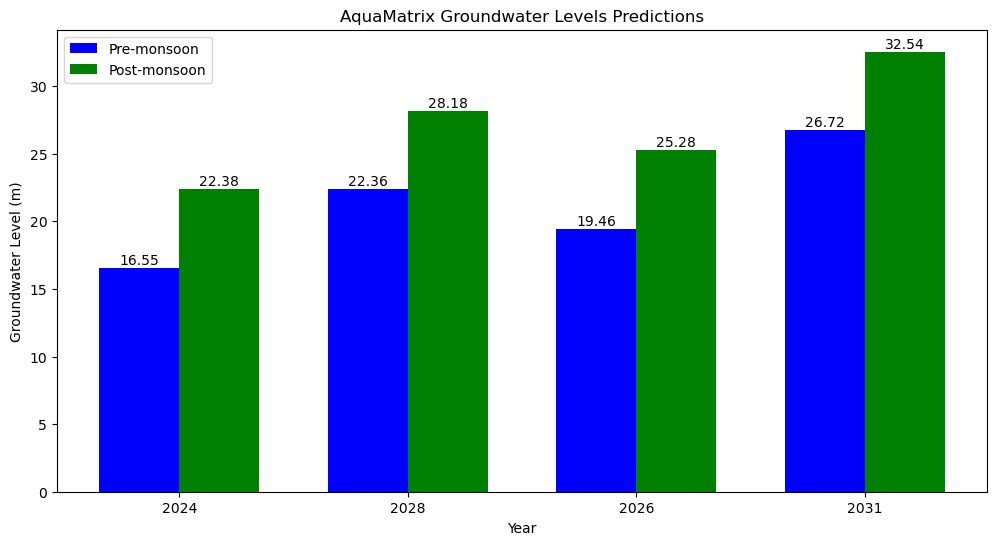

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# Get year inputs from the user
years = [int(input(f"Enter the year {i+1} for which you want to predict groundwater levels: ")) for i in range(4)]

# Initialize lists to store predictions and categories
pre_monsoon_preds = []
post_monsoon_preds = []
pre_monsoon_categories = []
post_monsoon_categories = []

# Loop through each year to make predictions
for year in years:
    # Predict for the input data
    pre_monsoon_pred, post_monsoon_pred = predict_future_levels(year, input_data)

    # Round the predictions to 2 decimal places
    pre_monsoon_pred = round(pre_monsoon_pred, 2)
    post_monsoon_pred = round(post_monsoon_pred, 2)

    # Categorize the predictions
    pre_monsoon_category, reason_pre = categorize_level(pre_monsoon_pred, 'Pre-monsoon')
    post_monsoon_category, reason_post = categorize_level(post_monsoon_pred, 'Post-monsoon')

    # Append predictions and categories to the lists
    pre_monsoon_preds.append(pre_monsoon_pred)
    post_monsoon_preds.append(post_monsoon_pred)
    pre_monsoon_categories.append(pre_monsoon_category)
    post_monsoon_categories.append(post_monsoon_category)

    # Display the results for each year
    print(f"\nPredicted Pre-monsoon level for {year}: {pre_monsoon_pred} meters")
    print(f"Category: {pre_monsoon_category}")
    print(f"Reason: {reason_pre}")

    print(f"\nPredicted Post-monsoon level for {year}: {post_monsoon_pred} meters")
    print(f"Category: {post_monsoon_category}")
    print(f"Reason: {reason_post}")


# Plotting the predictions as a bar plot
x = np.arange(len(years))  # label locations
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, pre_monsoon_preds, width, label='Pre-monsoon', color='b')
ax.bar(x + width/2, post_monsoon_preds, width, label='Post-monsoon', color='g')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Year')
ax.set_ylabel('Groundwater Level (m)')
ax.set_title('AquaMatrix Groundwater Levels Predictions')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

# Add value labels on the bars
for i in range(len(years)):
    ax.text(i - width/2, pre_monsoon_preds[i] + 0.05, str(pre_monsoon_preds[i]), ha='center', va='bottom')
    ax.text(i + width/2, post_monsoon_preds[i] + 0.05, str(post_monsoon_preds[i]), ha='center', va='bottom')

plt.show()


**Code Working:**    
The code starts by taking user input for four years, then initializes lists to store predictions and categories for pre-monsoon and post-monsoon periods. It iterates through each year, using two separate **GradientBoostingRegressor** models, one for pre-monsoon and one for post-monsoon, to predict groundwater levels using the `predict_future_levels` function.  The predictions are rounded and categorized into "Low," "Medium," or "High" using the `categorize_level` function. The results are displayed on the console.  Finally, it creates a bar plot visualizing the predictions for each year, with separate bars for pre-monsoon and post-monsoon predictions, labelled with the predicted values and a legend to distinguish the seasons. The plot is displayed using `plt.show()`.  The code relies on user-defined functions (`predict_future_levels` and `categorize_level`) for prediction and categorization. 


**Plot:**    
The above bar graph titled compares predicted pre-monsoon and post-monsoon groundwater levels for the years 2024, 2028, 2026, and 2031. It visually shows a general **upward trend for both seasons**, with post-monsoon levels consistently higher than pre-monsoon levels.  The predicted values for pre-monsoon range from 16.55m to 26.72m, while post-monsoon predictions vary from 22.38m to 32.54m. The graph suggests a longer-term forecast for groundwater levels and highlights the potential seasonal fluctuations in groundwater levels. 


# Conclusion

1.**Shift from Guesswork to Evidence** Many existing groundwater management practices rely on intuition, historical trends, and limited data.

2.**Accurate predictions** enable better water resource planning, helping water managers **make informed decisions** about:
Water Allocation,Aquifer Recharge,Irrigation Scheduling

3.This project can **identify potential groundwater** shortages or over-extraction in advance. 

4.This project can help identify areas that require **more intensive monitoring**, reducing the **cost and effort** of monitoring all areas equally. 

5.The project promotes **sustainable water security** by maintaining **groundwater levels**, supporting **economic development** through **reliable water supplies**, and protecting **ecosystems dependent on groundwater**, thus preventing **aquifer depletion** and **salinization**. 


<div style="text-align: center;">
    <img src="thankyou.webp" alt="Thank You" style="width: 1000px; height: 400px;">
</div>

# A R Muthudhanush Notebook
This notebook presents my Analysis and Predictions of Groundwater Dataset.   
**Date :**  August 1, 2024